In [1]:
import sys
sys.path.append('/n/home09/kboone/CompressedFisher/')

from getdist import plots, MCSamples
import matplotlib.pyplot as plt
from Bin_Helpers import *
import CompressedFisher
import numpy as np

import matplotlib
matplotlib.style.use('des_dr1')

In [2]:
# num_derivs = 75
# num_true = int(num_derivs/2)
# write_data = []
# ind_data = np.full(num_derivs, False)
# ind_data[:num_true] = True

# for _ in np.arange(1000):
#     np.random.shuffle(ind_data)
#     write_data.append(np.copy(ind_data))
# write_data = np.array(write_data)

# np.save('Splits_Data/Cross/Deriv_Splits_'+str(num_derivs)+'.npy', write_data)
# np.save('Splits_Data/CMBL/Deriv_Splits_'+str(num_derivs)+'.npy', write_data)

In [3]:
%matplotlib inline

In [4]:
Om = 0.3175
s8 = 0.834
deriv_params = ['Om', 's8']

In [7]:
surveys = ['ACT', 'Planck', 'SPT', 'SO']
surveys=['Planck']

cro = []
wph = []
both = []
cro_50 = []
wph_50 = []
cro_orig = []
wph_orig = []

cro_covs = []
wph_covs = []
both_covs = []
cro_50_covs = []
wph_50_covs = []
cro_orig_covs = []
wph_orig_covs = []

cro_25_covs = []
cro_75_covs = []
wph_25_covs = []
wph_75_covs = []

for s in surveys:
    
    covs = np.load('Splits_Data/Cross/Both_100_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    both.append(get_chain(cov)[0])
    both_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/Cl_100_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    cro.append(get_chain(cov)[0])
    cro_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/Cl_75_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    cro_75_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/Cl_50_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    cro_50.append(get_chain(cov)[0])
    cro_50_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/Cl_25_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    cro_25_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/Cl_100_'+s+'_x_dr3_orig_contours.npy')
    cov = np.average(covs, axis=0)
    cro_orig.append(get_chain(cov)[0])
    cro_orig_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/WPH_100_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    wph.append(get_chain(cov)[0])
    wph_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/WPH_75_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    wph_75_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/WPH_50_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    wph_50.append(get_chain(cov)[0])
    wph_50_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/WPH_25_'+s+'_x_dr3_contours.npy')
    cov = np.average(covs, axis=0)
    wph_25_covs.append(cov)
    
    covs = np.load('Splits_Data/Cross/WPH_100_'+s+'_x_dr3_orig_contours.npy')
    cov = np.average(covs, axis=0)
    wph_orig.append(get_chain(cov)[0])
    wph_orig_covs.append(cov)
    
cro_covs = np.array(cro_covs)
wph_covs = np.array(wph_covs)
cro_50_covs = np.array(cro_50_covs)
wph_50_covs = np.array(wph_50_covs)
cro_orig_covs = np.array(cro_orig_covs)
wph_orig_covs = np.array(wph_orig_covs)

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


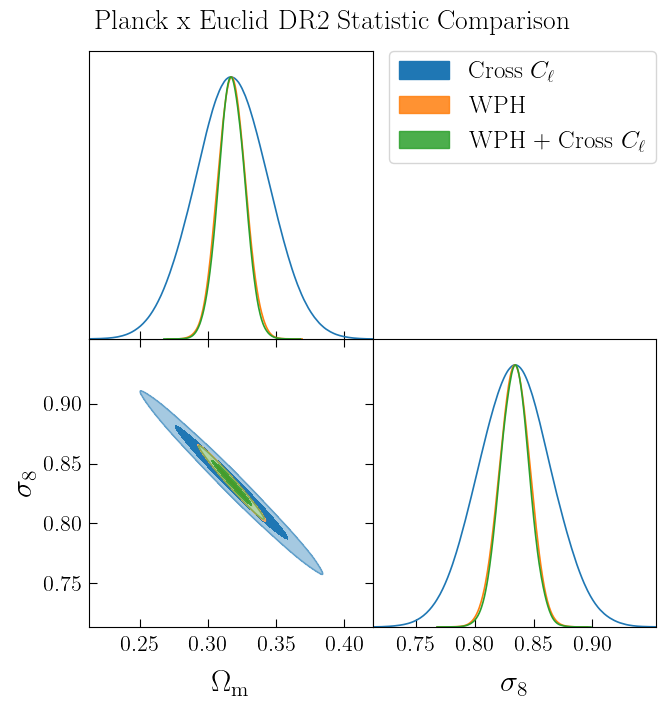

In [8]:
ind = 0
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([cro[ind]] + [wph[ind]] + [both[ind]],
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=[r'Cross $C_\ell$', 'WPH', r'WPH $+$ Cross $C_\ell$'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' x Euclid DR2 Statistic Comparison', y = 1.02, fontsize=20)
plt.show()

In [40]:
ind = 3
print(surveys[ind])
print(np.sqrt(wph_orig_covs[ind][0,0]) * 100)
print(np.sqrt(wph_orig_covs[ind][1,1]) * 100)

SO
1.4192848821168071
1.6357135041897353


In [19]:
ind = 3
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 13   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([cro_50[ind]] + [cro[ind]],
                ['Om','sigma8'],filled=False,  contour_lws=1.2, 
                legend_labels=['50 Derivative Realizations', '100'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+r' x Euclid DR2 Cross $C_\ell$ Derivative Convergence', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/'+surveys[ind]+'_CRO_Conv.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [23]:
ind = 3
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 13   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([wph_50[ind]] + [wph[ind]],
                ['Om','sigma8'],filled=False,  contour_lws=1.2, 
                legend_labels=['50 Derivative Realizations', '100'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' x Euclid DR2 WPH Derivative Convergence', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/'+surveys[ind]+'_WPH_Conv.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [44]:
ind = 1
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([wph_orig[ind]] + [wph[ind]],
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=['No Pivots', 'Learned Binning'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' x Euclid DR2 Learned Binning, WPH', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/'+surveys[ind]+'_Learned_Binning.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [45]:
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot(wph,
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=surveys, #legend_labels=[r'Cross $C_\ell$', 'WPH'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2), cmap(3)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2), cmap(3)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(r'WPH Constraints, All Cross Euclid DR2', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/All_WPH.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [46]:
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot(cro,
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=surveys, #legend_labels=[r'Cross $C_\ell$', 'WPH'],
                legend_loc='upper right', colors = [cmap(0), cmap(1), cmap(2), cmap(3)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1), cmap(2), cmap(3)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(r'Cross $C_\ell$ Constraints, All Cross Euclid DR2', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/All_CRO.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()

In [50]:
ind = 3
g = plots.getSubplotPlotter(width_inch=7)

g.settings.axes_fontsize = 16     # tick number font size
g.settings.axes_labelsize = 22    # axis label font size (Om, sigma8)
g.settings.legend_fontsize = 18   # legend text
g.settings.linewidth = 2.0        # (optional) thicker contour lines

cmap = plt.get_cmap("tab10")
g.triangle_plot([cro[ind]] + [wph[ind]],
                ['Om','sigma8'],filled=True,  contour_lws=1.2, 
                legend_labels=[r'Cross $C_\ell$', 'WPH'],
                legend_loc='upper right', colors = [cmap(0), cmap(1)],
                contour_ls = '-', contour_colors = [cmap(0), cmap(1)], 
                param_limits={'~Om': [Om-0.15,Om+0.15], '~sigma8': [s8-0.05,s8+0.05]})
g.fig.suptitle(surveys[ind]+' x Euclid DR2 Statistic Comparison', y = 1.02, fontsize=20)
g.fig.savefig('../Paper_Plots/'+surveys[ind]+'_x_DR3.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
              pad_inches=0.02)
plt.close()
# plt.show()